# Introduction

This lab demonstrates how to perform covariance estimation using regularization techniques such as shrinkage methods to reduce the variance of the estimator, as well as how to choose the bias-variance trade-off. We will compare three approaches to setting the regularization parameter.

# Generate Sample Data

We generate sample data with 40 features and 20 samples. We use **np.random.normal()** function to create a normal distribution.

In [1]:
import numpy as np

n_features, n_samples = 40, 20
np.random.seed(42)
base_X_train = np.random.normal(size=(n_samples, n_features))
base_X_test = np.random.normal(size=(n_samples, n_features))

coloring_matrix = np.random.normal(size=(n_features, n_features))
X_train = np.dot(base_X_train, coloring_matrix)
X_test = np.dot(base_X_test, coloring_matrix)

# Compute the Likelihood on Test Data

We calculate the negative log-likelihood on the test data using the **ShrunkCovariance** class from the **sklearn.covariance** module and the **log_likelihood** function from the **scipy.linalg** module. We span a range of possible shrinkage coefficient values and compute the likelihood for each value.

In [2]:
from sklearn.covariance import ShrunkCovariance, empirical_covariance, log_likelihood
from scipy import linalg

shrinkages = np.logspace(-2, 0, 30)
negative_logliks = [
    -ShrunkCovariance(shrinkage=s).fit(X_train).score(X_test) for s in shrinkages
]

real_cov = np.dot(coloring_matrix.T, coloring_matrix)
emp_cov = empirical_covariance(X_train)
loglik_real = -log_likelihood(emp_cov, linalg.inv(real_cov))

# Compare Different Approaches to Setting the Regularization Parameter

We compare three approaches to setting the regularization parameter: cross-validation, Ledoit-Wolf, and OAS.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.covariance import LedoitWolf, OAS

tuned_parameters = [{"shrinkage": shrinkages}]
cv = GridSearchCV(ShrunkCovariance(), tuned_parameters)
cv.fit(X_train)

lw = LedoitWolf()
loglik_lw = lw.fit(X_train).score(X_test)

oa = OAS()
loglik_oa = oa.fit(X_train).score(X_test)

# Plot Results

We plot the likelihood of unseen data for different values of the shrinkage parameter and show the choices by cross-validation, LedoitWolf, and OAS estimates.

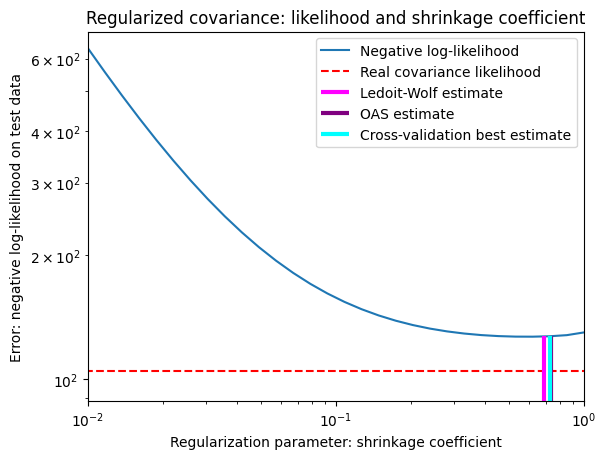

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title("Regularized covariance: likelihood and shrinkage coefficient")
plt.xlabel("Regularization parameter: shrinkage coefficient")
plt.ylabel("Error: negative log-likelihood on test data")

plt.loglog(shrinkages, negative_logliks, label="Negative log-likelihood")

plt.plot(plt.xlim(), 2 * [loglik_real], "--r", label="Real covariance likelihood")

lik_max = np.amax(negative_logliks)
lik_min = np.amin(negative_logliks)
ymin = lik_min - 6.0 * np.log((plt.ylim()[1] - plt.ylim()[0]))
ymax = lik_max + 10.0 * np.log(lik_max - lik_min)
xmin = shrinkages[0]
xmax = shrinkages[-1]

plt.vlines(
    lw.shrinkage_,
    ymin,
    -loglik_lw,
    color="magenta",
    linewidth=3,
    label="Ledoit-Wolf estimate",
)

plt.vlines(
    oa.shrinkage_, ymin, -loglik_oa, color="purple", linewidth=3, label="OAS estimate"
)

plt.vlines(
    cv.best_estimator_.shrinkage,
    ymin,
    -cv.best_estimator_.score(X_test),
    color="cyan",
    linewidth=3,
    label="Cross-validation best estimate",
)

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.legend()

plt.show()

# Summary

In this lab, we learned how to perform covariance estimation using regularization techniques such as shrinkage methods. We compared three approaches to setting the regularization parameter: cross-validation, Ledoit-Wolf, and OAS. We plotted the likelihood of unseen data for different values of the shrinkage parameter and showed the choices by cross-validation, LedoitWolf, and OAS estimates.